In [2]:
from matplotlib import pyplot as plt
from pylab import *
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

sys.path.insert(0, '/Users/haly/idefix/pytools')
from vtk_io import *
pi = 3.14






In [3]:
# Some useful functions

omega = 1.
t = np.linspace(0,10*pi,2000)
z = 1.
kappa = omega + 0.01
rho_g = 1.
psi_mod=0.1
psi = -1j * psi_mod

def drift_vel_warp(f,st,ax,colour,style,label):
    ts = st / omega
    
    # evolution under 2 fluid equations

    H = 2j*omega*ts+1.+f
    R = ts**2*(kappa**2-omega**2)

    u_g_2f = (psi*omega*ts)*((1j*omega*ts*(R+H)+f*R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)
    u_d_2f = (psi*omega*ts)*((1j*omega*ts*H-R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)

    ax.plot(t/2./pi,(u_d_2f-u_g_2f)/10.,linewidth=2.0,linestyle=style,color=colour, label=label)

eta = 0.005

def drift_vel_si(f,st,ax,colour,style):
    A = (1+f)**2+st**2
    u_g = 2.*eta*f*st/A
    u_d = -2.*eta*st/A
    print(u_d-u_g)
    
    ax.hlines(y=(u_d-u_g),xmin=0,xmax=np.max(t/2/pi),linewidth=2.0,linestyle=style,color=colour)


-0.004918032786885246


(0.0, 1.0)

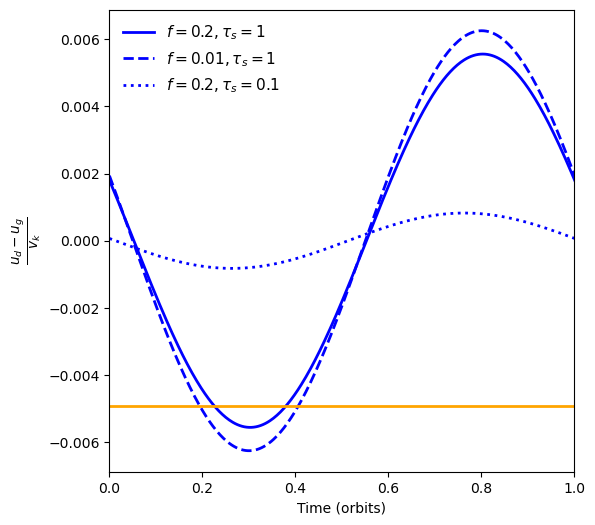

In [ ]:
# Figure 1: drift velocities comparison between sloshing and SI

plt.rcParams["figure.figsize"] = (6,6)
fig,ax = plt.subplots(1,1)

drift_vel_warp(f=0.2,st=1,ax=ax,colour="blue",style="solid",label=r"$f=0.2,\tau_s=1$")
drift_vel_warp(f=0.01,st=1,ax=ax,colour="blue",style="dashed",label=r"$f=0.01,\tau_s=1$")
drift_vel_warp(f=0.2,st=0.1,ax=ax,colour="blue",style="dotted",label=r"$f=0.2,\tau_s=0.1$")



#drift_vel_si(f=0.2,st=1,ax=ax,colour="orange",style="solid")
#drift_vel_si(f=0.01,st=1,ax=ax,colour="orange",style="dashed")
#drift_vel_si(f=0.2,st=0.1,ax=ax,colour="orange",style="dotted")

ax.set_xlabel("Time (orbits)")
ax.set_ylabel(r'$\frac{u_d-u_g}{v_k}$', fontsize=14)
ax.legend( loc='best', frameon=False, ncols=1,fontsize=11)
#ax.set_ylim(-0.07,0.07)
ax.set_xlim(0,1)